# <center>Laboratorium 4<br>Metod Numerycznych</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate
%load_ext memory_profiler

<a id='zad1'></a>
***Zadanie 1.***   

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor węzłów Czebyszewa (funkcja *chebyshev_nodes*) dany wzorem
  
  $$
  \begin{aligned}
  x(k) = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
  \end{aligned}
  $$

Oraz wagi barycentryczne dla tego typu wezłów (funkcja def *bar\_czeb\_weights*): 
$$
\begin{aligned}
w_j={}&(-1)^j\delta_j\\
\delta_j={}&
\begin{cases}
\frac{1}{2},\quad j=0\ \mathrm{lub}\ j=n\\
1,\quad j\in(0,n)
\end{cases}
\end{aligned}
$$

<a id='zad2'></a>
***Zadanie 2.***  
Do przeprowadzenia ćwiczenia należy zdefiniować następujące funkcje:  
1. Funkcję ciągłą nieróżniczkowalną: $f(x) = \mathrm{sgn}(x)x+x^2$  
2. Funkcję różniczkowalną jednokrotnie: $f(x) = \mathrm{sgn}(x)x^{2}$  
3. Funkcję różniczkowalną trzykrotnie: $f(x)=|\sin(5 x)|^3$  
4. Trzy funkcje analityczne: $f(x) = \cfrac{1}{1+ax^2}$ dla $a \in \{1,25,100\} $    
5. Funkcję nieciągłą: $f(x) = \mathrm{sgn}(x)$

Funkcje można zaimplementować w notaniku lub w pliku main. Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).

***Zadanie 3.***  
Dla funkcji ciągłej nieróżniczkowalnej z [Zadania 2](#zad2) przeprowadzić interpolację metodą  [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) przy użyciu funkcji *[barycentric_interpolate](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.barycentric_interpolate.html)* z pakietu *[Scipy](https://scipy.org/)* oraz przy użyciu wzoru barycentrycznego podanego na wykładzie (funkcja barycentric_inte w main.py).  

Wykonać w węzłach Czebyszewa interpolację rzędu 10, 100, 1000, 10000, 100000. Wyliczyć wartości wielomianu interpolacyjnego w równoodległych punktach w ilości 1000.  

Wykreślić wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w 1000 punktów).  

Przeanalizować czas obliczeń w zależności od rzędu interpolacji.  

Przykład użycia funkcji barycentric_interpolate:

In [2]:
#Funkcja stworzona w mainie
def func_bar_main(i):
    x_i = np.linspace(-1,1,1000)
    x_w_i = main.bar_czeb_weights(i)
    x_n_i = main.chebyshev_nodes(i)
    yimp_i = main.barycentric_inte(x_n_i,main.f_c_n(x_n_i),x_w_i,x_i)
    
def func_bar(i):
    x_i = np.linspace(-1,1,1000)
    w_i = main.chebyshev_nodes(i)
    yimp_i = barycentric_interpolate(w_i,main.f_c_n(w_i),x_i)

print(30*'-'," Analiza czasu obliczeń w zależności od rzędu interpolacji dla funkcji z pakietu scipy",30*'-')    
for nodes in [10, 100, 700]: # Badam tylko do 700, ponieważ dla wyższych rzędów ta funkcja nie jest użyteczna i nie działa
    print('Nodes: ', nodes)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func_bar(nodes)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    
        
print(30*'-'," Analiza czasu obliczeń w zależności od rzędu interpolacji dla funkcji z maina",30*'-')         
for nodes in [10, 100, 700,1000,3000,5000,10000]:
    print('Nodes: ', nodes)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func_bar_main(nodes)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
   
    
  
# Funkcja z pakietu scipy działa szybciej niż funckja zaimplementowana przezemnie w mainie, lecz moja funkcja
# umożliwia interpolacje wyższych rzędów

------------------------------  Analiza czasu obliczeń w zależności od rzędu interpolacji dla funkcji z pakietu scipy ------------------------------
Nodes:  10
Timing: 
544 µs ± 104 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Nodes:  100
Timing: 
2.83 ms ± 139 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Nodes:  700
Timing: 
16.6 ms ± 383 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
------------------------------  Analiza czasu obliczeń w zależności od rzędu interpolacji dla funkcji z maina ------------------------------
Nodes:  10
Timing: 
11.4 ms ± 280 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Nodes:  100
Timing: 
22.7 ms ± 913 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Nodes:  700
Timing: 
100 ms ± 1.58 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Nodes:  1000
Timing: 
143 ms ± 1.84 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Nodes:  3000
Timing: 
389 ms ± 3.79 ms per loop (mean ± std. dev. of 5 runs

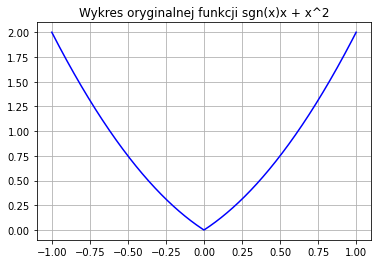

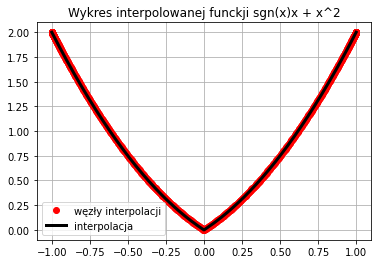

In [3]:


n = 1000 #Ilosc wezlow czebyszewa
x = np.linspace(-1,1,1000)
x_w = main.chebyshev_nodes(n)
w = main.bar_czeb_weights(n)
#yimp = barycentric_interpolate(x_w,main.f_c_n(x_w),x)
yimp_2 = main.barycentric_inte(x_w,main.f_c_n(x_w),w,x)

plt.plot(x,main.f_c_n(x),'b')
plt.title("Wykres oryginalnej funkcji sgn(x)x + x^2")
plt.grid()

#plt.plot(x_w,main.f_c_n(x_w),'go')
plt.figure()
#plt.plot(x,yimp,'r',label = "Wykres funkcji interpolowanej")
plt.plot(x_w,main.f_c_n(x_w),'ro',label = "węzły interpolacji")
plt.title("Wykres interpolowanej funckji sgn(x)x + x^2")
plt.plot(x,yimp_2,'k',linewidth = 3, label = "interpolacja")
#Z powodu duzego zagęszczenia punktów, punkty się zlewają na wykresie i powstaje gruba linia ciągła
plt.legend()
plt.grid()





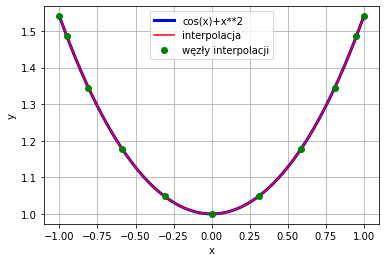

In [4]:
from scipy.interpolate import barycentric_interpolate

# funkcja do interpolacji
f = lambda x: np.cos(x)+x**2

# wektor współrzędnych x dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1,1,1000)

# węzły Czebyszewa 
interpolation_nodes_number = 10
xch = main.chebyshev_nodes(interpolation_nodes_number)

# interpoalcja metodą barycentryczną
yimp = barycentric_interpolate(xch,f(xch),x)

plt.plot(x,f(x),'b',  linewidth=3 ,label = 'cos(x)+x**2')
plt.plot(x,yimp,'r',label = 'interpolacja')
plt.plot(xch,f(xch),'go',label = 'węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = 0)
plt.grid()
plt.show()


***Zadanie 4.***  
Do oceny jakości interpolacji stosuje się normę wektorową $l_{\infty}$, dla różnicy wektorów definiujemy ją jako:  
  
$||\mathbf{x_1}-\mathbf{x_2}|| = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}$  
  
Zaimplementuj normę $l_{\infty}$ jako funkcję w main *L\_inf*. Za jej pomocą zbadaj jakość wszystkich przeprowadzonych interpolacji.

In [5]:


def norm_bar_main(i,f):
    x_i = np.linspace(-1,1,1000)
    x_w_i = main.bar_czeb_weights(i)                                           #Definiowanie funckji z ktorych korzystam
                                                                                 #Przy badaniu jakosci interpolacji  '''
    x_n_i = main.chebyshev_nodes(i)
    yimp_i = main.barycentric_inte(x_n_i,f(x_n_i),x_w_i,x_i)
    return x_i,yimp_i 
    
def norm_bar(i,f):
    x_i = np.linspace(-1,1,1000)
    w_i = main.chebyshev_nodes(i)
    yimp_i = barycentric_interpolate(w_i,f(w_i),x_i)
    return x_i,yimp_i

print(30*'-',"Jakość interpolacji dla funkcji z pakietu scipy",30*'-')
for nodes in [10, 100,700]: 
    print("Ilość węzłów: {0}\nJakość inerpolacji: {1}\n".format(nodes,main.L_inf(main.f_c_n(norm_bar(nodes,main.f_c_n)[0]),norm_bar(nodes,main.f_c_n)[1])))



print(30*'-',"Jakość interpolacji dla funkcji zaimplementowanej w mainie",30*'-')   
for nodes in [10, 100, 700,1000,3000,5000,10000]: # Badam tylko do 700, ponieważ dla wyższych rzędów ta funkcja nie jest użyteczna i nie działa
    print("Ilość węzłów: {0}\nJakość inerpolacji: {1}\n".format(nodes,main.L_inf(main.f_c_n(norm_bar_main(nodes,main.f_c_n)[0]),norm_bar_main(nodes,main.f_c_n)[1])))
    
        
      
 #Jakość interpolacji rośnie z ilością węzłów. Dodając do tego fakt, że funkcja barycentric_interpolate z pakietu scipy
#dla >1000 węzłów ma problem z działaniem,daje to  funkcji zaimplementowanej w mainie przewage w postaci możliwośći
#uzyskania większej dokładności

------------------------------ Jakość interpolacji dla funkcji z pakietu scipy ------------------------------
Ilość węzłów: 10
Jakość inerpolacji: 0.059219624368103435

Ilość węzłów: 100
Jakość inerpolacji: 0.0059654189244172165

Ilość węzłów: 700
Jakość inerpolacji: 0.0006967361435593862

------------------------------ Jakość interpolacji dla funkcji zaimplementowanej w mainie ------------------------------
Ilość węzłów: 10
Jakość inerpolacji: 0.05921962436810316

Ilość węzłów: 100
Jakość inerpolacji: 0.00596541892441703

Ilość węzłów: 700
Jakość inerpolacji: 0.0006967361435595782

Ilość węzłów: 1000
Jakość inerpolacji: 0.0005739642836657185

Ilość węzłów: 3000
Jakość inerpolacji: 2.2289226270880928e-05

Ilość węzłów: 5000
Jakość inerpolacji: 5.251772992729154e-05

Ilość węzłów: 10000
Jakość inerpolacji: 8.30350512818893e-06



***Zadanie 5.***  
Dla funkcji jednokrotnie i trzykrotnie różniczkowalnej z [Zadania 2](#zad2). Przeanalizować w pętli jakość interpolacji dla różnych rzędów interpolacji $n$. 
W tym celu należy wyliczyć wartość funkcji i wielomianu interpolacyjnego w 1000 punktów i wyliczyć normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.
Dla każdej z funkcji sporządzić wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.
Dla porównania umieścić na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

------------------------------ Jakość interpolacji dla funkcji różniczkowalnej jednokrotnie ------------------------------
Ilość węzłów: 10
Jakość inerpolacji: 0.007616055567867567

Ilość węzłów: 30
Jakość inerpolacji: 0.0008378304127568985

Ilość węzłów: 50
Jakość inerpolacji: 0.00030104031591445945

Ilość węzłów: 100
Jakość inerpolacji: 7.531864985178382e-05

Ilość węzłów: 300
Jakość inerpolacji: 8.148812314158232e-06

Ilość węzłów: 500
Jakość inerpolacji: 2.7778586885024788e-06

Ilość węzłów: 1000
Jakość inerpolacji: 7.480901684445674e-07

Ilość węzłów: 3000
Jakość inerpolacji: 5.7643897898756994e-09

Ilość węzłów: 5000
Jakość inerpolacji: 7.590687031838414e-09

Ilość węzłów: 10000
Jakość inerpolacji: 3.651669443115945e-10

Ilość węzłów: 30000
Jakość inerpolacji: 9.191312563192722e-12

Ilość węzłów: 50000
Jakość inerpolacji: 2.6254847278320064e-13

Ilość węzłów: 100000
Jakość inerpolacji: 3.441691376337985e-14

Ilość węzłów: 200000
Jakość inerpolacji: 4.0190073491430667e-14

Ilość w

Text(0, 0.5, 'Norma błędu')

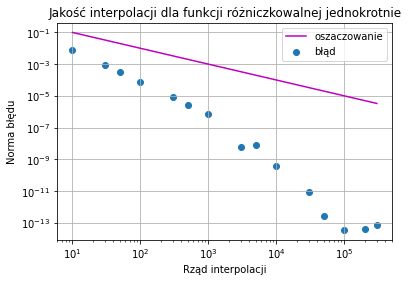

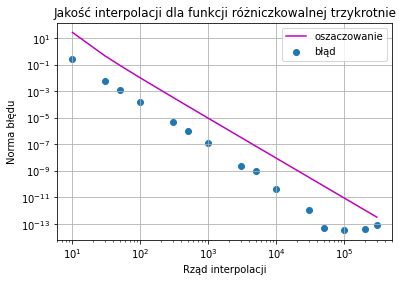

In [6]:

def norm_bar_main(i,f):
    x_i = np.linspace(-1,1,1000)
    x_w_i = main.bar_czeb_weights(i)
    x_n_i = main.chebyshev_nodes(i)
    yimp_i = main.barycentric_inte(x_n_i,f(x_n_i),x_w_i,x_i)
    return x_i,yimp_i 
nodes = [10,30,50,100,300,500,1000,3000,5000,10000,30000,50000,100000,200000,300000]
norma_f_r_1 = []
n_1 = []
print(30*'-',"Jakość interpolacji dla funkcji różniczkowalnej jednokrotnie",30*'-')   
for i in nodes: 
    print("Ilość węzłów: {0}\nJakość inerpolacji: {1}\n".format(i,main.L_inf(main.f_r_1(norm_bar_main(i,main.f_r_1)[0]),norm_bar_main(i,main.f_r_1)[1])))
    norma_f_r_1.append(main.L_inf(main.f_r_1(norm_bar_main(i,main.f_r_1)[0]),norm_bar_main(i,main.f_r_1)[1]))
    n_1.append(i**-1)

plt.plot(nodes,n_1,'m',label = "oszaczowanie")    
plt.scatter(nodes,norma_f_r_1,label="błąd")
plt.title("Jakość interpolacji dla funkcji różniczkowalnej jednokrotnie")
plt.loglog()
plt.legend()
plt.xlabel("Rząd interpolacji")
plt.ylabel("Norma błędu")
  
plt.grid()


V=2.102e4
norma_f_r_3 = []
n_2 = []
print(30*'-',"Jakość interpolacji dla funkcji różniczkowalnej trzykrotnie",30*'-')  
for i in nodes:
    print("Ilość węzłów: {0}\nJakość inerpolacji: {1}\n".format(i,main.L_inf(main.f_r_3(norm_bar_main(i,main.f_r_3)[0]),norm_bar_main(i,main.f_r_3)[1])))
    norma_f_r_3.append(main.L_inf(main.f_r_3(norm_bar_main(i,main.f_r_3)[0]),norm_bar_main(i,main.f_r_3)[1]))
    n_2.append(4*V/3/np.pi/(i-3)**3)
plt.figure()    
plt.plot(nodes,n_2,'m',label = "oszaczowanie")
plt.scatter(nodes,norma_f_r_3,label="błąd")
plt.loglog()
plt.legend()
plt.grid()
plt.title("Jakość interpolacji dla funkcji różniczkowalnej trzykrotnie")
plt.xlabel("Rząd interpolacji")
plt.ylabel("Norma błędu")
  
    

***Zadanie 6.***  
Przeprowadzić analogiczną analizę dla funkcji analitycznych z [Zadania 2](#zad2). Wykres sporządzić w skali pół logarytmicznej (tylko oś y). 
Dla porównania umieścić na wykresie dodatkowo wykres oszacowania dla interpolacji funkcji analitycznych (zobacz wykład). W tym celu należy wyliczyć maksimum funkcji na przedziale $[-1,1]$ oraz największą elipsę, o ogniskach w punktach $(-1, j0)$ i $(1, j0)$, która nie zawiera pierwiastków mianownika funkcji.

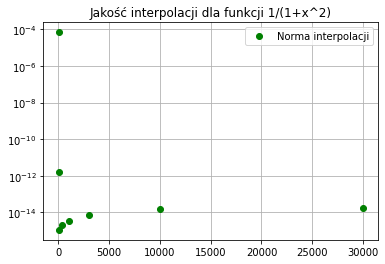

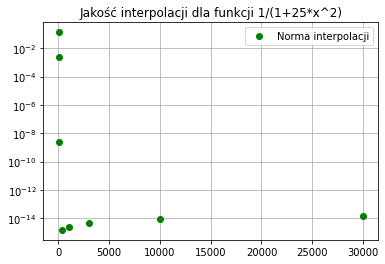

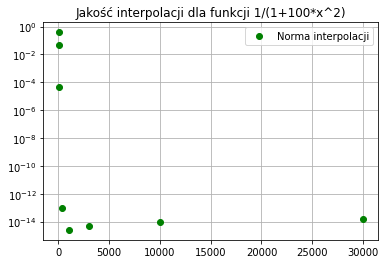

In [7]:
x = np.linspace(-1, 1, 1000)
norm_f_an_1 = []
norm_f_an_2 = []
norm_f_an_3 = []


n_list = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
for n in n_list:
    elem1 = main.L_inf(main.f_an_1(x), main.barycentric_inte(main.chebyshev_nodes(n), main.f_an_1(main.chebyshev_nodes(n)),
                                                      main.bar_czeb_weights(n), x))
    norm_f_an_1.append(elem1)
    
    elem2 = main.L_inf(main.f_an_2(x), main.barycentric_inte(main.chebyshev_nodes(n), main.f_an_2(main.chebyshev_nodes(n)),
                                                      main.bar_czeb_weights(n), x))
    norm_f_an_2.append(elem2)
    
    elem3 = main.L_inf(main.f_an_3(x), main.barycentric_inte(main.chebyshev_nodes(n), main.f_an_3(main.chebyshev_nodes(n)),
                                                      main.bar_czeb_weights(n), x))
    norm_f_an_3.append(elem3)
    
plt.figure()
plt.plot(n_list, norm_f_an_1,'go' ,label='Norma interpolacji')
plt.title('Jakość interpolacji dla funkcji 1/(1+x^2)')
plt.legend()
plt.semilogy()
plt.grid()
plt.show()

plt.figure()
plt.plot(n_list, norm_f_an_2,'go', label='Norma interpolacji')
plt.title('Jakość interpolacji dla funkcji 1/(1+25*x^2)')
plt.legend()
plt.semilogy()
plt.grid()
plt.show()

plt.figure()
plt.plot(n_list, norm_f_an_3,'go' ,label='Norma interpolacji')
plt.title('Jakość interpolacji dla funkcji 1/(1+100*x^2)')
plt.legend()
plt.semilogy()
plt.grid()
plt.show()


***Zadanie 7.***  
Dla funkcji nieciągłej z [Zadania 2](#zad2) przeanalizować efekt Gibbsa
oddzielnie dla parzystych i nieparzystych $n$. Oddzielnie wyliczyć jaki jest minimalny błąd niezależny od rzędu. Dlaczego wartości dla parzystych i nieparzystych $n$ się różnią?   
***Wskazówka:*** Wykonać wykres funkcji i jej funkcji interpolującej.

Rząd interpolacji:50   -------- Jakość interpolacji:1.9888503426593984
Rząd interpolacji:51   -------- Jakość interpolacji:0.9810459784148562
Rząd interpolacji:100   -------- Jakość interpolacji:1.977497441063269
Rząd interpolacji:101   -------- Jakość interpolacji:0.9624728896340461
Rząd interpolacji:100000   -------- Jakość interpolacji:0.0044048642366461
Rząd interpolacji:100001   -------- Jakość interpolacji:0.01950095674387775


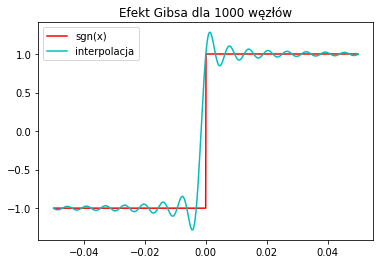

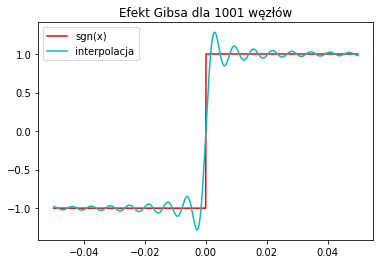

<Figure size 432x288 with 0 Axes>

In [8]:

n_1 = 1000 #Ilosc wezlow czebyszewa
n_2 = 1001
x_1 = np.linspace(-0.05,0.05,1000)
x_2 = np.linspace(-0.05,0.05,1000)
x_w_p = main.chebyshev_nodes(n_1)
w_p = main.bar_czeb_weights(n_1)
x_w_n = main.chebyshev_nodes(n_2)
w_n = main.bar_czeb_weights(n_2)
#yimp = barycentric_interpolate(x_w,main.f_c_n(x_w),x)
yimp_1 = main.barycentric_inte(x_w_p,main.f_sgn(x_w_p),w_p,x_1)
yimp_2 = main.barycentric_inte(x_w_n,main.f_sgn(x_w_n),w_n,x_2)
plt.plot(x_1,main.f_sgn(x_1),'r',label = "sgn(x)")
plt.plot(x_1,yimp_1,'c',label = "interpolacja")
plt.legend()
plt.title("Efekt Gibsa dla 1000 węzłów")
plt.figure()

plt.plot(x_2,main.f_sgn(x_2),'r',label = "sgn(x)")
plt.plot(x_2,yimp_2,'c',label = "interpolacja")
plt.legend()
plt.title("Efekt Gibsa dla 1001 węzłów")
#Dla parzystej ilosci węzłow interpolacja przy punkcie nieciągłości jest przesunięta w lewo
#względem interpolacji dla nieparzstej ilości węzłów, co  dla mniejszej liczby węzłów daje przewage nieparzystej liczbie węzłów
#, w postaci większej dokładności. Dla dostatecznie dużego rzędu, wyniki się odwracają i to parzyste rzędu dają dokładniejsze
#wyniki
plt.figure()

l = [50,51,100,101,100000,100001]
for i in l:
    x = np.linspace(-0.5,0.5,1000)
    x_w_p = main.chebyshev_nodes(i)
    w_p = main.bar_czeb_weights(i)
    y_imp = main.barycentric_inte(x_w_p,main.f_sgn(x_w_p),w_p,x)
    print("Rząd interpolacji:{0}   -------- Jakość interpolacji:{1}".format(i,main.L_inf(main.f_sgn(x),y_imp)))







Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)